<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [4]:
#file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [5]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [6]:
# Identify duplicate rows
duplicates = df[df.duplicated()]

# Count the number of duplicate rows
duplicate_count = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_count}')
df = df.drop_duplicates()
df.shape

Number of duplicate rows: 20


(65437, 114)

### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [7]:
missing_count = df['CodingActivities'].isnull().sum()
print(f"Missing values in 'CodingActivities': {missing_count}")

Missing values in 'CodingActivities': 10971


##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [8]:
# Impute missing values in 'CodingActivities' using forward-fill
df['CodingActivities'] = df['CodingActivities'].ffill()

# Check if imputation worked
print(df['CodingActivities'].isnull().sum())  # Should be 0 if all missing values were filled


0


**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [9]:
missing_count = df['ConvertedCompYearly'].isnull().sum()
print(f"Missing values in 'ConvertedCompYearly': {missing_count}")

summary = df['ConvertedCompYearly'].describe()
summary['1%'] = df['ConvertedCompYearly'].quantile(0.01)
summary['5%'] = df['ConvertedCompYearly'].quantile(0.05)

print(summary)

Missing values in 'ConvertedCompYearly': 42002
count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
1%       2.076800e+02
5%       3.497000e+03
Name: ConvertedCompYearly, dtype: float64


In [10]:
#calculcate average compensation by aeducation level and missing values
df.groupby('EdLevel').agg(
    mean_comp=('ConvertedCompYearly', 'mean'),
    missing_count=('ConvertedCompYearly', lambda x: x.isna().sum())
)


,mean_comp,missing_count
EdLevel,,
"Associate degree (A.A., A.S., etc.)",75964.554667,1043
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",88477.182151,14577
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",85725.929586,8726
Primary/elementary school,65733.578231,999
"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",128351.152381,1815
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",56389.470886,4608
Some college/university study without earning a degree,78914.449338,4858
Something else,68315.435407,723


In [11]:
#remove outliers 

lower_bound = df['ConvertedCompYearly'].quantile(0.01)
upper_bound = df['ConvertedCompYearly'].quantile(0.99)

# Filter out outliers
df_no_outliers = df[
    (df['ConvertedCompYearly'].isna()) |
    ((df['ConvertedCompYearly'] >= lower_bound) &
     (df['ConvertedCompYearly'] <= upper_bound))
]


summary = df_no_outliers['ConvertedCompYearly'].describe()
summary['1%'] = df_no_outliers['ConvertedCompYearly'].quantile(0.01)
summary['5%'] = df_no_outliers['ConvertedCompYearly'].quantile(0.05)

print(summary)


df_no_outliers.groupby('EdLevel').agg(
    mean_comp=('ConvertedCompYearly', 'mean'),
    missing_count=('ConvertedCompYearly', lambda x: x.isna().sum())
)


count     22965.000000
mean      78606.216329
std       61963.639186
min         209.000000
25%       33758.000000
50%       65000.000000
75%      107406.000000
max      386662.000000
1%          773.000000
5%         4307.000000
Name: ConvertedCompYearly, dtype: float64


,mean_comp,missing_count
EdLevel,,
"Associate degree (A.A., A.S., etc.)",72662.172554,1043
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",80644.245647,14577
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",80398.567543,8726
Primary/elementary school,67077.338235,999
"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",93415.384135,1815
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",54784.456336,4608
Some college/university study without earning a degree,74246.733942,4858
Something else,61056.082524,723


In [12]:

# Compute mean per EdLevel
mean_by_group = df_no_outliers.groupby('EdLevel')['ConvertedCompYearly'].transform('mean')

# Fill NaN values with the mean of their group
df_no_outliers.loc[:, 'ConvertedCompYearly'] = df_no_outliers['ConvertedCompYearly'].fillna(mean_by_group)


# Create a clean copy
df_edited = df_no_outliers.copy()

summary = df_edited['ConvertedCompYearly'].describe()
summary['1%'] = df_edited['ConvertedCompYearly'].quantile(0.01)
summary['5%'] = df_edited['ConvertedCompYearly'].quantile(0.05)

print(summary)

df_edited.groupby('EdLevel').agg(
    mean_comp=('ConvertedCompYearly', 'mean'),
    missing_count=('ConvertedCompYearly', lambda x: x.isna().sum())
)


count     60314.000000
mean      77128.487784
std       38976.299479
min         209.000000
25%       60000.000000
50%       80398.567543
75%       80644.245647
max      386662.000000
1%         1922.390000
5%        15466.000000
Name: ConvertedCompYearly, dtype: float64


,mean_comp,missing_count
EdLevel,,
"Associate degree (A.A., A.S., etc.)",72662.172554,0
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",80644.245647,0
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",80398.567543,0
Primary/elementary school,67077.338235,0
"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",93415.384135,0
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",54784.456336,0
Some college/university study without earning a degree,74246.733942,0
Something else,61056.082524,0


##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [13]:

# Min-Max Scaling for ConvertedCompYearly
min_val = df_edited['ConvertedCompYearly'].min()
max_val = df_edited['ConvertedCompYearly'].max()

# Create new column with normalized values
df_edited['ConvertedCompYearly_MinMax'] = (df_edited['ConvertedCompYearly'] - min_val) / (max_val - min_val)

# Display first few rows
print(df_edited[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax']].head())


   ConvertedCompYearly  ConvertedCompYearly_MinMax
0         67077.338235                    0.173031
1         80644.245647                    0.208137
2         80398.567543                    0.207501
3         74246.733942                    0.191583
4         54784.456336                    0.141221


##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [14]:

# Compute mean and standard deviation
mean_val = df_edited['ConvertedCompYearly'].mean()
std_val = df_edited['ConvertedCompYearly'].std()

# Apply Z-score normalization
df_edited['ConvertedCompYearly_Zscore'] = (df_edited['ConvertedCompYearly'] - mean_val) / std_val

# Display first few rows
print(df_edited[['ConvertedCompYearly', 'ConvertedCompYearly_Zscore']].head())


   ConvertedCompYearly  ConvertedCompYearly_Zscore
0         67077.338235                   -0.257878
1         80644.245647                    0.090202
2         80398.567543                    0.083899
3         74246.733942                   -0.073936
4         54784.456336                   -0.573272


### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


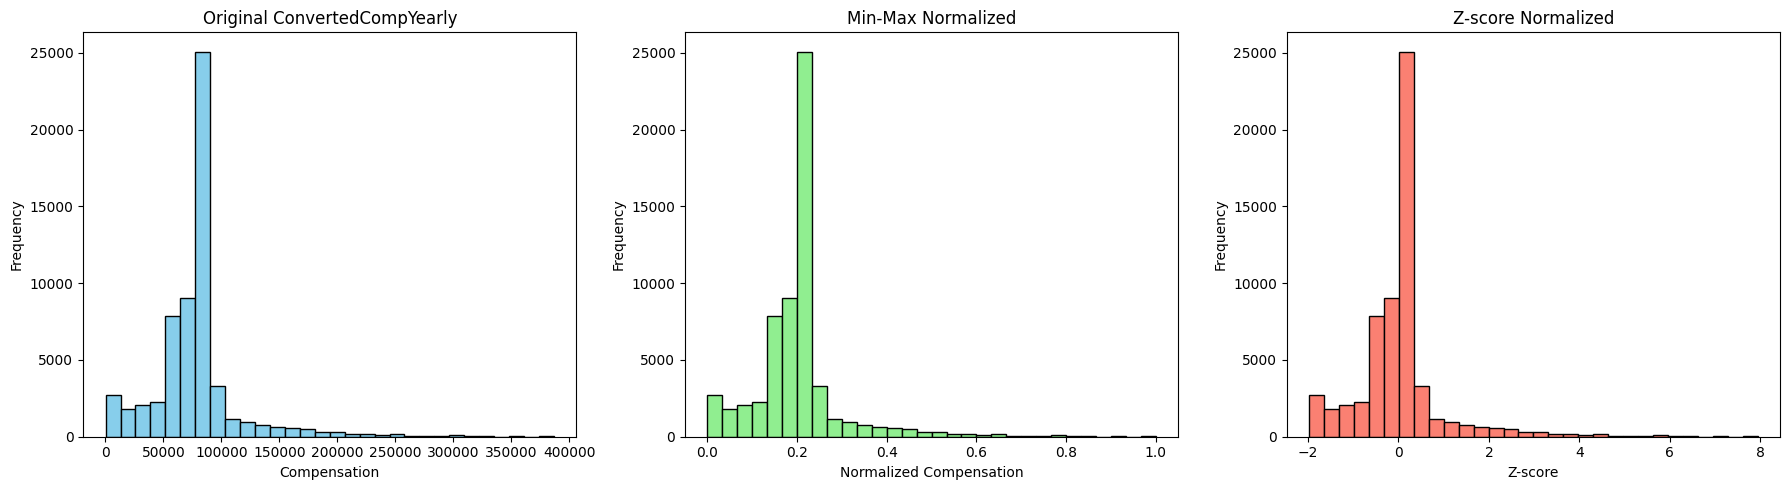

In [18]:

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram for original ConvertedCompYearly
axes[0].hist(df_edited['ConvertedCompYearly'].dropna(), bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Original ConvertedCompYearly')
axes[0].set_xlabel('Compensation')
axes[0].set_ylabel('Frequency')

# Histogram for Min-Max Normalized
axes[1].hist(df_edited['ConvertedCompYearly_MinMax'].dropna(), bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Min-Max Normalized')
axes[1].set_xlabel('Normalized Compensation')
axes[1].set_ylabel('Frequency')

# Histogram for Z-score Normalized
axes[2].hist(df_edited['ConvertedCompYearly_Zscore'].dropna(), bins=30, color='salmon', edgecolor='black')
axes[2].set_title('Z-score Normalized')
axes[2].set_xlabel('Z-score')
axes[2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
